In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import csv
import os

/usr/local/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Anscombe's Quartet

id                                                   x       ...  \
        count  mean       std   min   25%   50%   75%   max count mean  ...   
dataset                                                                 ...   
I        11.0   5.0  3.316625   0.0   2.5   5.0   7.5  10.0  11.0  9.0  ...   
II       11.0  16.0  3.316625  11.0  13.5  16.0  18.5  21.0  11.0  9.0  ...   
III      11.0  27.0  3.316625  22.0  24.5  27.0  29.5  32.0  11.0  9.0  ...   
IV       11.0  38.0  3.316625  33.0  35.5  38.0  40.5  43.0  11.0  9.0  ...   

                        y                                                      
          75%   max count      mean       std   min    25%   50%   75%    max  
dataset                                                                        
I        11.5  14.0  11.0  7.500909  2.031568  4.26  6.315  7.58  8.57  10.84  
II       11.5  14.0  11.0  7.500909  2.031657  3.10  6.695  8.14  8.95   9.26  
III      11.5  14.0  11.0  7.500000  2.030424  5.39  6.250  7.11  7.98  12.74  
IV        8.0  19.0  11.0  7.500909  2.030579  5.25  6.170  7.04  8.19  12.50  

[4 rows x 24 columns]

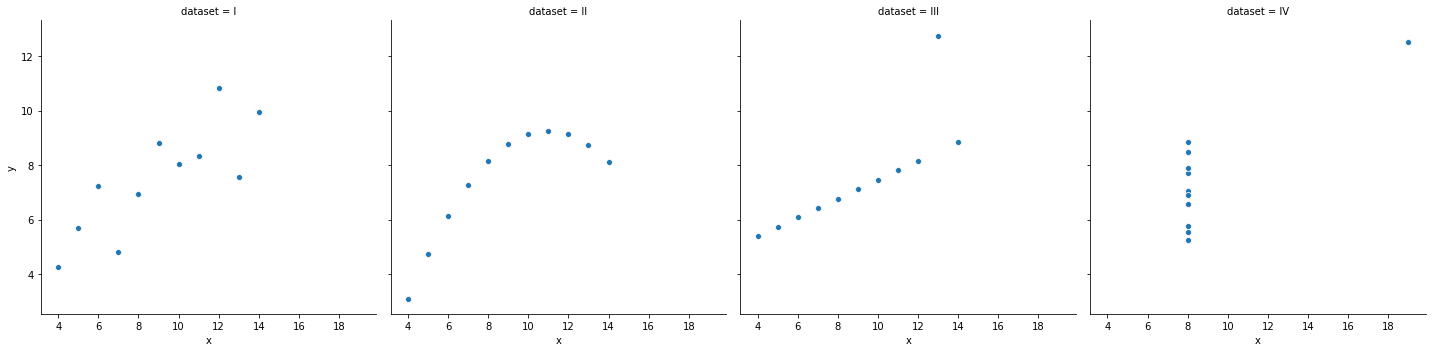

In [2]:
url = "https://gist.githubusercontent.com/ryanorsinger/6218f5731f3df7cb4771ff3879fdeaa3/raw/88cb6bed276e2236c33df011bd753b6c73832c30/quartet.csv"

df = pd.read_csv(url)

sns.relplot(x = 'x', y = 'y', col = 'dataset', data=df)
df.groupby('dataset').describe()

#### Using Z-Score for identifying outliers

In [3]:
#Given some data
x = np.random.normal(50, 40, size = 1000) #mu, sigma and size

# Calculate the z-score 
zscores = pd.Series((x-x.mean())/ x.std())

# Finds all of the observations two standard deviations or more.
x[zscores.abs() >= 2]

# Finds all of the observations three standard deviations or more
x[zscores.abs() >= 3]

array([177.63553011])

In [4]:
df = pd.read_csv('data/lemonade.csv')

In [5]:
df.describe()

,Temperature,Rainfall,Flyers,Price,Sales
count,365.000000,365.000000,365.000000,365.0,365.000000
mean,61.224658,0.825973,40.104110,0.5,27.589041
std,18.085892,0.273890,13.786445,0.0,29.979680
min,15.100000,0.400000,-38.000000,0.5,7.000000
25%,49.700000,0.650000,31.000000,0.5,20.000000
50%,61.100000,0.740000,39.000000,0.5,25.000000
75%,71.700000,0.910000,49.000000,0.5,30.000000
max,212.000000,2.500000,80.000000,0.5,534.000000


In [6]:
df.set_index('Date', inplace = True)
df.head()

,Day,Temperature,Rainfall,Flyers,Price,Sales
Date,,,,,,
1/1/17,Sunday,27.0,2.00,15,0.5,10
1/2/17,Monday,28.9,1.33,15,0.5,13
1/3/17,Tuesday,34.5,1.33,27,0.5,15
1/4/17,Wednesday,44.1,1.05,28,0.5,17
1/5/17,Thursday,42.4,1.00,33,0.5,18


Text(0.5, 1.0, 'Tempurature over time')

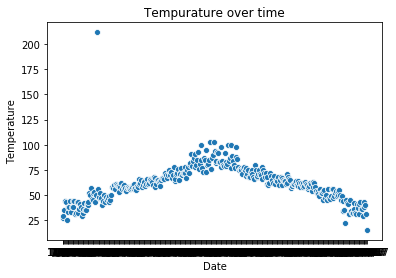

In [8]:
sns.scatterplot(x=df.index, y=df.Temperature).set_title('Tempurature over time')

Text(0.5, 1.0, 'Rainfall over time')

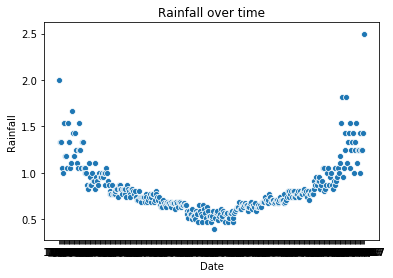

In [11]:
sns.scatterplot(x = df.index, y = df.Rainfall).set_title('Rainfall over time')

Text(0.5, 1.0, 'Sales over time')

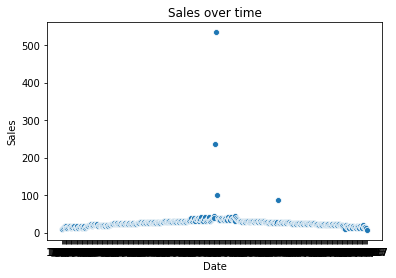

In [12]:
sns.scatterplot(x = df.index, y = df.Sales).set_title('Sales over time')

Text(0.5, 1.0, 'Flyers over time')

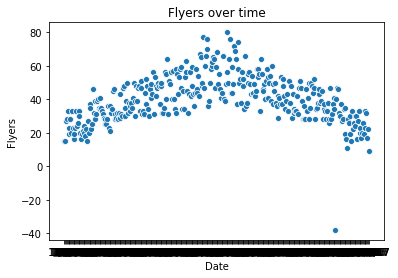

In [14]:
sns.scatterplot(x = df.index, y = df.Flyers).set_title('Flyers over time')

In [9]:
upper = df.quantile(q = .75)
upper

Temperature    71.70
Rainfall        0.91
Flyers         49.00
Price           0.50
Sales          30.00
Name: 0.75, dtype: float64

In [10]:
lower = df.quantile(q = .25)
lower

Temperature    49.70
Rainfall        0.65
Flyers         31.00
Price           0.50
Sales          20.00
Name: 0.25, dtype: float64

In [15]:
iqr = upper - lower

In [33]:
def get_lower_and_upper_bounds(series):
    multiplier = 1.5
    upper_bound = upper + iqr*multiplier
    lower_bound = lower - iqr*multiplier
    return lower_bound, upper_bound

In [34]:
lower_bound, upper_bound = get_lower_and_upper_bounds(df.Temperature)

In [35]:
lower_bound

Temperature    16.70
Rainfall        0.26
Flyers          4.00
Price           0.50
Sales           5.00
dtype: float64

In [36]:
upper_bound

Temperature    104.7
Rainfall         1.3
Flyers          76.0
Price            0.5
Sales           45.0
dtype: float64

In [38]:
df.Temperature[df.Temperature < lower_bound.Temperature]

Date
12/31/17    15.1
Name: Temperature, dtype: float64

In [39]:
df.Temperature[df.Temperature > upper_bound.Temperature]

Date
2/11/17    212.0
Name: Temperature, dtype: float64

In [40]:
df.Rainfall[df.Rainfall < lower_bound.Rainfall]

Series([], Name: Rainfall, dtype: float64)

In [41]:
df.Rainfall[df.Rainfall > upper_bound.Rainfall]

Date
1/1/17      2.00
1/2/17      1.33
1/3/17      1.33
1/6/17      1.54
1/7/17      1.54
1/11/17     1.54
1/12/17     1.33
1/13/17     1.33
1/16/17     1.67
1/17/17     1.43
1/20/17     1.43
1/24/17     1.54
1/28/17     1.33
1/29/17     1.33
12/4/17     1.54
12/5/17     1.82
12/9/17     1.43
12/10/17    1.82
12/12/17    1.33
12/13/17    1.43
12/14/17    1.54
12/17/17    1.33
12/18/17    1.43
12/21/17    1.33
12/22/17    1.54
12/26/17    1.43
12/30/17    1.43
12/31/17    2.50
Name: Rainfall, dtype: float64

In [42]:
df.Flyers[df.Flyers < lower_bound.Flyers]

Date
11/21/17   -38
Name: Flyers, dtype: int64

In [43]:
df.Flyers[df.Flyers > upper_bound.Flyers]

Date
6/16/17    77
7/14/17    80
Name: Flyers, dtype: int64

In [44]:
df.Sales[df.Sales < lower_bound.Sales]

Series([], Name: Sales, dtype: int64)

In [45]:
df.Sales[df.Sales > upper_bound.Sales]

Date
7/3/17     235
7/4/17     534
7/5/17      99
9/16/17     87
Name: Sales, dtype: int64

In [46]:
from scipy import stats

In [48]:
print('Temperature:', stats.normaltest(df.Temperature))
print('Rainfall:', stats.normaltest(df.Rainfall))
print('Flyers:', stats.normaltest(df.Flyers))
print('Sales:', stats.normaltest(df.Sales))

Temperature: NormaltestResult(statistic=167.85600853401706, pvalue=3.5524736859556525e-37)
Rainfall: NormaltestResult(statistic=152.07858542963368, pvalue=9.474466534734132e-34)
Flyers: NormaltestResult(statistic=25.203527052823677, pvalue=3.366073836658171e-06)
Sales: NormaltestResult(statistic=754.0533143433992, pvalue=1.817202225018871e-164)


In [51]:
mean_temp = df.Temperature.mean()
mean_rain = df.Rainfall.mean()
mean_flyers = df.Flyers.mean()
mean_sales = df.Sales.mean()

61.22465753424662
0.8259726027397268
40.104109589041094
27.589041095890412


In [53]:
sigmaT = df.Temperature.std()
sigmaR = df.Rainfall.std()
sigmaF = df.Flyers.std()
sigmaS = df.Sales.std()

In [57]:
upper_2_std = df.Temperature.mean() + 2 * sigmaT
lower_2_std = df.Temperature.mean() - 2 * sigmaT

In [58]:
upper_2_std

97.39644213085184

In [59]:
lower_2_std

25.052872937641396

In [60]:
upper_3_std = df.Temperature.mean() + 3 * sigmaT
lower_3_std = df.Temperature.mean() - 3 * sigmaT

In [61]:
print(upper_3_std)
print(lower_3_std)

115.48233442915445
6.966980639338786


In [70]:
df[df.Temperature < lower_2_std]

,Day,Temperature,Rainfall,Flyers,Price,Sales
Date,,,,,,
12/5/17,Tuesday,22.0,1.82,11,0.5,10
12/31/17,Sunday,15.1,2.50,9,0.5,7


In [69]:
df[df.Temperature > upper_2_std]

,Day,Temperature,Rainfall,Flyers,Price,Sales
Date,,,,,,
2/11/17,Saturday,212.0,0.91,35,0.5,21
6/16/17,Friday,99.3,0.47,77,0.5,41
6/26/17,Monday,102.6,0.47,60,0.5,42
7/1/17,Saturday,102.9,0.47,59,0.5,43
7/10/17,Monday,98.0,0.49,66,0.5,40
7/18/17,Tuesday,99.3,0.47,76,0.5,41
7/22/17,Saturday,99.6,0.47,49,0.5,42
7/27/17,Thursday,97.9,0.47,74,0.5,43


In [68]:
df[df.Temperature < lower_3_std]

,Day,Temperature,Rainfall,Flyers,Price,Sales
Date,,,,,,


In [67]:
df[df.Temperature > upper_3_std]

,Day,Temperature,Rainfall,Flyers,Price,Sales
Date,,,,,,
2/11/17,Saturday,212.0,0.91,35,0.5,21
